# Google Developer Students Club

Build your ML portfolio with NLP
---
Using Named Entity Recognition we will learn how to train a custom model to automatically summarize content by identifying key entities and extracting sensitive information from them. 

## Setup & Imports

In [1]:
!pip install -U spacy -q

In [ ]:
!python -m spacy download en_core_web_md -q

In [ ]:
!pip show spacy


In [35]:
import spacy
from spacy import displacy
from IPython.core.display import HTML

# Loading a pre-trained NLP language model to start.

nlp = spacy.load('en_core_web_md')


## NLP Capabilities

*   Named Entity Recognition
*   Similarity & Vectors for Semantic search, Anomaly Detection etc.
*   Part-of-Speech (POS) tagging
*   Text extraction and classification
*   ...
*   Also... pretty much anything large language model enabled generative AI can do 😀

> _We'll cover usecases and what these capabilities are used for at the end._



### Semantic Search (Vectors & Similarity)

In [36]:
doc1 = nlp("the bees decided to have a mutiny against their queen")
doc2 = nlp("flying stinging insects rebelled in opposition to the matriarch")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8722925944423142


In [ ]:
# Spacy doc object
doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

# Create spans for "great restaurant" and "really nice bar"
span1 = doc[3:5]
span2 = doc[12:15]

# Get the similarity of the spans
similarity = span1.similarity(span2)
print(similarity)

### Parts of Speech Tagging

In [37]:
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, " 👉 ", token.pos_)

I  👉  PRON
am  👉  AUX
writing  👉  VERB
to  👉  PART
report  👉  VERB
a  👉  DET
bug  👉  NOUN
in  👉  ADP
the  👉  DET
website  👉  NOUN
.  👉  PUNCT
I  👉  PRON
was  👉  AUX
trying  👉  VERB
to  👉  PART
make  👉  VERB
a  👉  DET
purchase  👉  NOUN
,  👉  PUNCT
and  👉  CCONJ
when  👉  SCONJ
I  👉  PRON
entered  👉  VERB
my  👉  PRON
credit  👉  NOUN
card  👉  NOUN
number  👉  NOUN
,  👉  PUNCT
it  👉  PRON
was  👉  AUX
displayed  👉  VERB
on  👉  ADP
the  👉  DET
screen  👉  NOUN
in  👉  ADP
plain  👉  ADJ
text  👉  NOUN
.  👉  PUNCT
I  👉  PRON
am  👉  AUX
concerned  👉  ADJ
that  👉  SCONJ
this  👉  PRON
is  👉  AUX
a  👉  DET
security  👉  NOUN
risk  👉  NOUN
,  👉  PUNCT
and  👉  CCONJ
I  👉  PRON
would  👉  AUX
like  👉  VERB
it  👉  PRON
to  👉  PART
be  👉  AUX
fixed  👉  VERB
.  👉  PUNCT
Here  👉  ADV
is  👉  AUX
the  👉  DET
credit  👉  NOUN
card  👉  NOUN
number  👉  NOUN
that  👉  PRON
was  👉  AUX
displayed  👉  VERB
:  👉  PUNCT
2149889926091208  👉  NUM
I  👉  PRON
am  👉  AUX
also  👉  ADV
concerned  👉  ADJ
that  👉  SCONJ
other  👉  AD

# Let's teach machines to recognize sensitive data

Setup above

```
import spacy
from spacy import displacy
from IPython.core.display import HTML

nlp = spacy.load('en_core_web_md')
```

In [39]:
#@title 1.Data Loading {display-mode: "form"}

txt = "In West Philadelphia born and raised, on the playground is where Kwame Appiah spent most of the December. "
txt += "Chillin out maxing relaxing in the Mennonite farmlands he spent 25 dollars on 2 pounds of corn. "
txt += "He used this Visa 4290 7558 4051 5357 which seemed expired so he moved up to live with his auntie and uncle in Bel Air."

doc = nlp(txt)


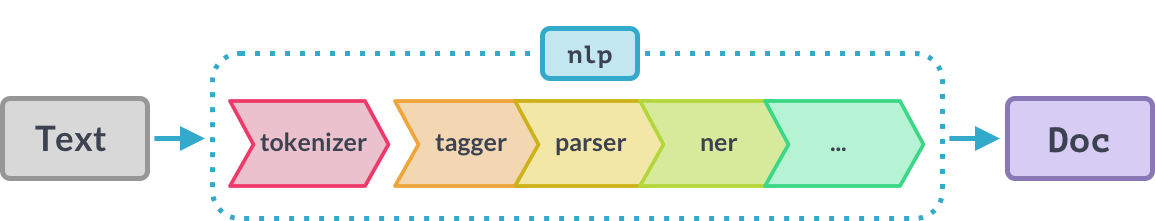

In [40]:
#@title 2.Text Pre-processing for EDA & training {display-mode: "form"}

for ent in doc.ents:
      print (ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))


West Philadelphia | GPE | Countries, cities, states
Kwame Appiah | PERSON | People, including fictional
December | DATE | Absolute or relative dates or periods
Mennonite | NORP | Nationalities or religious or political groups
25 dollars | MONEY | Monetary values, including unit
2 pounds | QUANTITY | Measurements, as of weight or distance
Visa | ORG | Companies, agencies, institutions, etc.
Bel Air | ORG | Companies, agencies, institutions, etc.


In [41]:
#@title 2.1.Visualizing data saves time {display-mode: "form"}

html = displacy.render(doc, style='ent', jupyter=False, page=True)

displacy.render(doc, style='ent')
display(HTML(html))

In [43]:
#@title  3.Model Training {display-mode: "form"}

import spacy
import random
from spacy.util import minibatch, compounding
from IPython.core.display import HTML
from spacy import displacy
from spacy.training import Example

TRAIN_DATA = [
    ("Can I share my credit card number? 4290 7558 4051 5355", {"entities": [(35, 55, "CREDIT_CARD")]}),
    ("1234 5678 9012 3456.", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("I accidentally shared my card details 9876 5432 1098 1111 with someone.", {"entities": [(36, 56, "CREDIT_CARD")]}),
    ("I paid with my credit card 4532 0136 7890 1245 for the purchase.", {"entities": [(26, 46, "CREDIT_CARD")]}),
    ("The transaction was made using card number 6011 5832 4321 9876.", {"entities": [(40, 60, "CREDIT_CARD")]}),
    ("He entered the card details 3456 7890 1234 5678 on the website.", {"entities": [(29, 49, "CREDIT_CARD")]}),
    ("My new credit card number is 4929 0123 4567 8901.", {"entities": [(28, 48, "CREDIT_CARD")]}),
    ("Please use the following card 6771 5467 8901 2345 for payment.", {"entities": [(30, 50, "CREDIT_CARD")]}),
    ("The customer provided card number 6011 0009 8765 4321 for billing.", {"entities": [(34, 54, "CREDIT_CARD")]}),
    ("She handed over her card 4716 0123 4567 8901 at the counter.", {"entities": [(23, 43, "CREDIT_CARD")]}),
    ("I used 6011 1111 2222 3333 during checkout.", {"entities": [(6, 26, "CREDIT_CARD")]}),
    ("Why does it say my card 4485 6789 0123 4567 isn't working?", {"entities": [(22, 42, "CREDIT_CARD")]}),
    ("Can I share my card 2221 0012 3456 7890?", {"entities": [(17, 37, "CREDIT_CARD")]}),
    ("My credit card number is 4290755840515355.", {"entities": [(23, 39, "CREDIT_CARD")]}),
    ("I paid with my credit card 4290 7558 4051 5355 at the store.", {"entities": [(26, 46, "CREDIT_CARD")]}),
    ("The transaction was made using card number 4000567890123456.", {"entities": [(40, 56, "CREDIT_CARD")]}),
    ("He entered the card details 6789 0123 4567 8901 on the website.", {"entities": [(29, 49, "CREDIT_CARD")]})
]

# Load a blank spacy model for our custom training 
nlp = spacy.blank("en")
ner = nlp.add_pipe("ner", last=True)
ner.add_label("CREDIT_CARD")

# Convert the training data to a list of Example objects
examples = []
for text, annots in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annots)
    examples.append(example)

# Train the NER model
optimizer = nlp.initialize()
for i in range(50):  # Number of training iterations
    random.shuffle(examples)
    losses = {}
    batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        nlp.update(batch, sgd=optimizer, drop=0.35, losses=losses)
    print("Losses", losses)

# Test the new custom model
txt = input("Prompt: ")
doc = nlp(txt)

# Render the named entities using displacy
html = displacy.render(doc, style='ent', jupyter=False, page=True)

# Display the HTML
display(HTML(html))

Losses {'ner': 104.32879197597504}
Losses {'ner': 58.27892084419727}
Losses {'ner': 12.540571574354544}
Losses {'ner': 2.346784768318936}
Losses {'ner': 2.0014413424104824}
Losses {'ner': 1.9989475039628024}
Losses {'ner': 1.9998161822266154}
Losses {'ner': 1.9994804030176743}
Losses {'ner': 1.9977626873087897}
Losses {'ner': 1.0807187498433208}
Losses {'ner': 1.0227865519023405}
Losses {'ner': 1.538680896717123}
Losses {'ner': 0.9839845993347617}
Losses {'ner': 8.104126268830338}
Losses {'ner': 3.314506359088822}
Losses {'ner': 3.8404053297582346}
Losses {'ner': 2.658389012913861}
Losses {'ner': 3.690802996869524}
Losses {'ner': 0.9716242596232548}
Losses {'ner': 3.4820730048504034}
Losses {'ner': 1.6894971700130457}
Losses {'ner': 0.7199509077402539}
Losses {'ner': 0.4680581441444486}
Losses {'ner': 0.32007752863796013}
Losses {'ner': 0.06487308386123239}
Losses {'ner': 0.0019010329226784417}
Losses {'ner': 1.9989604052132781}
Losses {'ner': 1.9951137135366745}
Losses {'ner': 0.00034

## 4.Model Evaluation

In [44]:
from spacy.util import minibatch, compounding
from IPython.core.display import HTML
from spacy import displacy
from spacy.training import Example

# Load the pre-trained model
nlp = spacy.load("en_core_web_md")

# Get the NER component
ner = nlp.get_pipe("ner")

# Add the new entity label to the NER component
ner.add_label("CREDIT_CARD")

# Prepare labeled training data with correct character offsets
TRAIN_DATA = [
    ("4290 7558 4051 5355", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("1234 5678 9012 3456.", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("I accidentally shared my card details 9876 5432 1098 7654 with someone.", {"entities": [(31, 50, "CREDIT_CARD")]}),
    ("I paid with my credit card 4532 0136 7890 1245 for the purchase.", {"entities": [(27, 46, "CREDIT_CARD")]}),
    ("The transaction was made using card number 6011 5832 4321 9876.", {"entities": [(37, 56, "CREDIT_CARD")]}),
    ("He entered the card details 3456 7890 1234 5678 on the website.", {"entities": [(28, 47, "CREDIT_CARD")]}),
    ("My new credit card number is 4929 0123 4567 8901.", {"entities": [(27, 46, "CREDIT_CARD")]}),
    ("Please use the following card 6771 5467 8901 2345 for payment.", {"entities": [(29, 48, "CREDIT_CARD")]}),
    ("The customer provided card number 6011 0009 8765 4321 for billing.", {"entities": [(31, 50, "CREDIT_CARD")]}),
    ("She handed over her card 4716 0123 4567 8901 at the counter.", {"entities": [(24, 43, "CREDIT_CARD")]}),
    ("6011 1111 2222 3333 during checkout.", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("4485 6789 0123 4567 online.", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("2221 0012 3456 7890.", {"entities": [(0, 19, "CREDIT_CARD")]}),
]
# Convert the training data to a list of Example objects
examples = []
for text, annots in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annots)
    examples.append(example)

# Train the NER model
optimizer = nlp.resume_training()
for i in range(30):  # Number of training iterations
    random.shuffle(examples)
    losses = {}
    batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        nlp.update(batch, sgd=optimizer, drop=0.35, losses=losses)

# Test the new custom model
txt = "In West Philadelphia born and raised, on the playground is where Noble Ackerson spent most of the December. "
txt += "Chillin out maxing relaxing in the Ghanaian farmlands he spent 25 dollars on 2 pounds of corn. "
txt += "He used this credit card number 4000 7558 4051 5357 which seemed expired so he moved up to live with his auntie and uncle in Bel Air."

# Process the text with the trained NER model
doc = nlp(txt)

# Render the named entities using displacy
html = displacy.render(doc, style='ent', jupyter=False, page=True)

# Display the HTML in the Colab output cell
display(HTML(html))


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "I accidentally shared my card details 9876 5432 10..." with entities "[(31, 50, 'CREDIT_CARD')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "The transaction was made using card number 6011 58..." with entities "[(37, 56, 'CREDIT_CARD')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "My new credit card number is 4929 0

### Dealing with model overfitting

Our model is overfitting the training data. 





In [ ]:
!python -m spacy download en_core_web_lg -q


In [45]:


# Text, entity tuple: Prepare labeled training data with correct character offsets 
TRAIN_DATA = [
    ("My card number is 4290 7558 4051 8766. Can you check if it's valid?", {"entities": [(19, 39, "CREDIT_CARD")]}),
    ("I accidentally shared my card details 9876 5432 1098 7654 with someone.", {"entities": [(32, 52, "CREDIT_CARD")]}),
    ("I paid with my credit card 4532 6457 7890 1245 for the purchase.", {"entities": [(28, 48, "CREDIT_CARD")]}),
    ("The transaction was made using card number 6011 5832 4321 9876.", {"entities": [(38, 58, "CREDIT_CARD")]}),
    ("He entered the card details 3456 7890 1234 5678 on the website.", {"entities": [(29, 49, "CREDIT_CARD")]}),
    ("My new credit card number is 4929 0123 4567 8901.", {"entities": [(28, 48, "CREDIT_CARD")]}),
    ("Please use the following card 6771 5467 432 2345 for payment.", {"entities": [(30, 50, "CREDIT_CARD")]}),
    ("The customer provided card number 6011 0009 8765 4321 for billing.", {"entities": [(32, 52, "CREDIT_CARD")]}),
    ("She handed over her card 4716 0123 4567 8901 at the counter.", {"entities": [(25, 45, "CREDIT_CARD")]}),
    ("6011 1111 2222 3333 was used during checkout.", {"entities": [(0, 19, "CREDIT_CARD")]}),
    ("I made an online payment using 4485 1111 0123 4567.", {"entities": [(29, 49, "CREDIT_CARD")]}),
    ("The card 2221 0012 3456 7890 was declined.", {"entities": [(9, 29, "CREDIT_CARD")]}),
    ("I lost my wallet and it had my credit card 1234 5678 9012 3456 in it.", {"entities": [(40, 60, "CREDIT_CARD")]}),
    ("Can you confirm if the card 5555 4444 3333 2222 is still active?", {"entities": [(29, 49, "CREDIT_CARD")]}),
    ("I received a new card with number 1111 0984 3333 4444 from the bank.", {"entities": [(32, 52, "CREDIT_CARD")]}),
]

TRAIN_DATA.extend([
    ("In West Philadelphia born and raised, on the playground is where Noble Ackerson spent most of the December.", {"entities": [(3, 17, "GPE"), (65, 79, "PERSON")]}),
    ("Chillin out maxing relaxing in the Ghanaian farmlands he spent 25 dollars on 2 pounds of corn.", {"entities": [(32, 40, "NORP"), (62, 73, "MONEY"), (77, 85, "QUANTITY")]}),
    ("He moved up to live with his auntie and uncle in Bel Air.", {"entities": [(47, 54, "GPE")]}),
])

# Prepare labeled evaluation data (separate from training data)
EVAL_DATA = [
    ("He used this credit card number 4000 7558 4051 5357 which seemed expired.", {"entities": [(32, 51, "CREDIT_CARD")]}),
    ("The payment was made with card 1234 5678 9012 3456 on the website.", {"entities": [(28, 47, "CREDIT_CARD")]}),
    ("I need to update my card details to 9876 5432 1098 7654 for future transactions.", {"entities": [(31, 50, "CREDIT_CARD")]}),
    ("My old card 2222 3333 4444 5555 was lost, so I got a new one: 6666 7777 8888 9999.", {"entities": [(10, 29, "CREDIT_CARD"), (58, 77, "CREDIT_CARD")]}),
    ("The customer's card number is 1111 2222 3333 4444, and the expiry date is 12/25.", {"entities": [(26, 45, "CREDIT_CARD")]}),
    ("I accidentally entered the wrong card number 8888 9999 1111 2222 during checkout.", {"entities": [(40, 59, "CREDIT_CARD")]}),
    ("For online purchases, you can use card 5555 4444 3333 2222 or card 6666 2222 3333 4444.", {"entities": [(35, 54, "CREDIT_CARD"), (63, 82, "CREDIT_CARD")]}),
    ("The transaction failed because the card 1234 5678 0000 9999 was declined.", {"entities": [(37, 56, "CREDIT_CARD")]}),
]

# Convert the training data to a list of Example objects
examples = []
for text, annots in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annots)
    examples.append(example)

# Train the NER model
optimizer = nlp.resume_training()
for i in range(20):  # Increased number of training iterations
    random.shuffle(examples)
    losses = {}
    batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        nlp.update(batch, sgd=optimizer, drop=0.35, losses=losses)

# Evaluate the model on the evaluation set
for text, annots in EVAL_DATA:
    doc = nlp(text)
    
    for ent in doc.ents:
      print (ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

# Define the text variable
txt = "In West Philadelphia born and raised, on the playground is where Nhyra Quarcoopome spent most of the December. "
txt += "Chillin out maxing relaxing in the Ghana farmlands he spent 25 dollars on 2 pounds of corn. "
txt += "He used this credit card number 4000 2311 0987 5357 which seemed expired so he moved up to live with his auntie and uncle in Bel Air."

# Process the text with the trained NER model
doc = nlp(txt)

# Render the named entities using displacy
html = displacy.render(doc, style='ent', jupyter=False, page=True)

# Display the HTML in the output cell
display(HTML(html))


/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "My card number is 4290 7558 4051 8766. Can you che..." with entities "[(19, 39, 'CREDIT_CARD')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "I accidentally shared my card details 9876 5432 10..." with entities "[(32, 52, 'CREDIT_CARD')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/spacy/training/iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "I paid with my credit card 4532 645

4000 7558 4051 5357 | CREDIT_CARD | None
1234 5678 9012 3456 | CREDIT_CARD | None
9876 5432 1098 7654 | CREDIT_CARD | None
2222 3333 4444 5555 | CREDIT_CARD | None
6666 7777 8888 9999 | CREDIT_CARD | None
1111 2222 3333 4444 | CREDIT_CARD | None
8888 9999 1111 2222 | CREDIT_CARD | None
5555 4444 3333 2222 | CREDIT_CARD | None
6666 2222 3333 4444 | CREDIT_CARD | None
1234 5678 0000 9999 | CREDIT_CARD | None


# Bringing it all together with best practices in NLP development

Load the ner pipeline and create training and evaluation data 

for the "CREDIT_CARD" entity from a data source like a JSON file.

Upload to and deploy on Vertex

### 4.1 Load & Train the NER model

In [ ]:
!pip install google-cloud-aiplatform 


In [31]:
# Ingesting large datasets
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [32]:
import json
import random
from spacy.util import minibatch, compounding
from spacy.training import Example
from spacy import displacy
#from google.cloud import aiplatform

# Get the NER component
ner = nlp.get_pipe("ner")

# Add the new entity label to the NER component
ner.add_label("CREDIT_CARD")

# Load training data from a JSON file
train_source = "/content/drive/MyDrive/GDE_CONTENT_TALKS/2023/data/train_data.json"
with open(train_source, 'r') as f:
    TRAIN_DATA = json.load(f)

# Prepare labeled evaluation data
eval_source = "/content/drive/MyDrive/GDE_CONTENT_TALKS/2023/data/eval_data.json"
with open(eval_source, 'r') as f:
    EVAL_DATA = json.load(f)

# Convert the training data to a list of Example objects
examples = []
for text, annots in TRAIN_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annots)
    examples.append(example)

# Train the NER model
optimizer = nlp.resume_training()
for i in range(100):  # Increased number of training iterations
    random.shuffle(examples)
    losses = {}
    batches = minibatch(examples, size=compounding(4.0, 32.0, 1.001))
    for batch in batches:
        nlp.update(batch, sgd=optimizer, drop=0.35, losses=losses)

# Save the trained model
nlp.to_disk("./custom_ner_model")




## 4.2. Evaluate & Test

Evaluate the model on the evaluation data and visualize the results using displaCy.


In [33]:
!pip install seaborn pandas spacy -q


In [ ]:
#!python -m spacy download en_core_web_md -q

Evaluation Metrics:
{'token_acc': 1.0, 'token_p': 1.0, 'token_r': 1.0, 'token_f': 1.0, 'tag_acc': None, 'sents_p': None, 'sents_r': None, 'sents_f': None, 'dep_uas': None, 'dep_las': None, 'dep_las_per_type': None, 'pos_acc': None, 'morph_acc': None, 'morph_micro_p': None, 'morph_micro_r': None, 'morph_micro_f': None, 'morph_per_feat': None, 'lemma_acc': None, 'ents_p': 0.0, 'ents_r': 0.0, 'ents_f': 0.0, 'ents_per_type': {'CREDIT_CARD': {'p': 0.0, 'r': 0.0, 'f': 0.0}}}
Confusion Matrix:


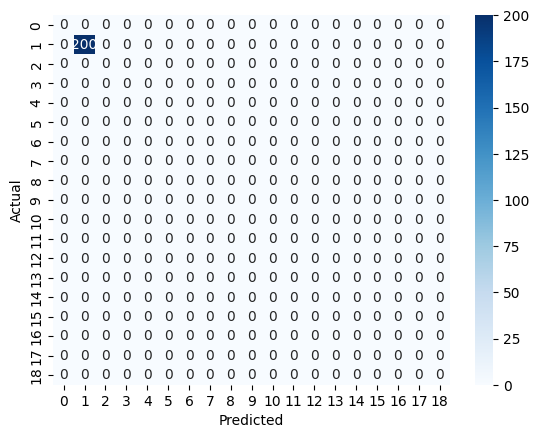

Classification Report:
              precision  recall  f1-score  support
CREDIT_CARD         1.0     1.0       1.0    200.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    200.0
weighted avg        1.0     1.0       1.0    200.0


In [34]:
import json
import spacy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from spacy.training import Example
from spacy import displacy
from spacy.scorer import Scorer
from sklearn.metrics import confusion_matrix, classification_report

# Load the saved model
nlp = spacy.load("./custom_ner_model")

# Prepare labeled evaluation data
eval_source = "/content/drive/MyDrive/GDE_CONTENT_TALKS/2023/data/eval_data.json"
with open(eval_source, 'r') as f:
    EVAL_DATA = json.load(f)

# Convert the evaluation data to a list of Example objects
eval_examples = []
for text, annots in EVAL_DATA:
    doc = nlp.make_doc(text)
    example = Example.from_dict(doc, annots)
    eval_examples.append(example)

# Initialize the scorer
scorer = Scorer(nlp)

# Lists to keep predictions and true labels
true_labels = []
pred_labels = []

for example in eval_examples:
    # Score the example
    scores = scorer.score([example])

    # For the confusion matrix, we need the true labels and predicted labels
    doc = nlp(example.text)
    true_labels.extend([ent.label_ for ent in example.reference.ents])
    pred_labels.extend([ent.label_ for ent in doc.ents])

# Print the evaluation metrics
print("Evaluation Metrics:")
print(scores)

# Generate confusion matrix
confusion = confusion_matrix(true_labels, pred_labels, labels=nlp.get_pipe('ner').labels)

print('Confusion Matrix:')
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Generate classification report
report = classification_report(true_labels, pred_labels, output_dict=True)

# Convert report to DataFrame for a cleaner look
report_df = pd.DataFrame(report).transpose()

print('Classification Report:')
print(report_df)

# Perform a basic error analysis by manually inspecting a subset of the predictions
for example in random.sample(eval_examples, 1):
    doc = nlp(example.text)
    displacy.render(doc, style='ent', jupyter=True)



In [ ]:
import spacy
from spacy import displacy
import json

# Load the trained model from disk
nlp = spacy.load("./custom_ner_model")

# Load new test data 
test_source = "/content/drive/MyDrive/GDE_CONTENT_TALKS/2023/data/test_data.json"
with open(test_source, 'r') as f:
    TEST_DATA = json.load(f)

# Select an example from the test data (let's use the first one)
text, _ = TEST_DATA[5]

# Process the text with the trained NER model
doc = nlp(text)

# Render the named entities using displaCy
displacy.render(doc, style="ent", jupyter=True)




## 4.3. Model deployment

**My preference: Convert notebook to python and leverage zenML.**

For this demo, we can fast track with Flask.

Use Vertex, TFX (KerasNLP),or [an open source solution like ZenML](https://github.com/zenml-io/zenml/tree/main/examples/vertex_ai_orchestration) 

Following [the following tutorial](https://towardsdatascience.com/deploy-a-scikit-learn-nlp-model-with-docker-gcp-cloud-run-and-flask-ba958733997a) 

#### Package and deploy the API to Google Cloud Run:

Create a Dockerfile in your project folder:
```
FROM tiangolo/uvicorn-gunicorn-fastapi:python3.9

COPY ./app /app
COPY ./trained_model /app/trained_model

RUN pip install spacy

```
Build and push Docker image to **Artifact Registry** (Container Registry is being phased out, btw)

```
gcloud builds submit --tag gcr.io/your_project_id/ner-api
```

**Deploy to Google Cloud Run**
```
gcloud run deploy ner-api \
  --image gcr.io/project_id/ner-api \
  --platform managed \
  --region your_region \
  --allow-unauthenticated
```


